# Dataset

Taken from: https://collegescorecard.ed.gov/data/

Used the 2012 data: merged_2012_PP.csv

# Questions from the data

Can we categorize various schools based on their 6-year graduation rate?

In [1]:
%load_ext watermark
%watermark -a 'Atun Anggara' -u -d -v -p numpy,pandas,matplotlib,scikit-learn

Atun Anggara 
last updated: 2016-12-04 

CPython 3.5.2
IPython 5.1.0

numpy 1.11.2
pandas 0.18.1
matplotlib 1.5.3
scikit-learn 0.17.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import urllib.request
#from urllib2 import Request, urlopen, URLError
import json
import requests
#import ijson
from __future__ import division

In [3]:
%matplotlib inline

In [4]:
df_2012 = pd.read_csv('merged_2012_PP.csv', encoding='latin1')
df_2012.head()

//anaconda/envs/py3k/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1517,1532,1575) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,0.440384615385,0.435294117647,0.469199178645,0.40465631929,0.458398744113,0.418864097363,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,0.744820616473,0.814925373134,0.78531598513,0.749778956676,0.760399334443,0.786069651741,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,0.458563535912,0.605263157895,0.465277777778,0.544642857143,0.496,0.514851485149,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,0.726251276813,0.842342342342,0.778034682081,0.767926988266,0.770916334661,0.785009861933,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,0.291703442189,0.39175257732,0.33665480427,0.272277227723,0.279705573081,0.310344827586,NaN,NaN,NaN,NaN


In [5]:
df_2012 = df_2012.replace(r'PrivacySuppressed', np.nan,regex=True)

In [6]:
df_2012.C150_4.isnull().sum()

5370

In [7]:
maindf2012 = df_2012.dropna(subset=['C150_4'])

In [8]:
maindf2012.shape

(2423, 1729)

In [9]:
# choose only the main campus (main = 1)
maindf2012=maindf2012[maindf2012.main==1]

In [10]:
maindf2012 = maindf2012.drop('main', 1)

In [11]:
# have >95% to reduce the amount of features being used to see the accuracy
cleaneddf = maindf2012.dropna(thresh=1902,axis=1)

In [12]:
cleaneddf.isnull().sum()

UNITID             0
OPEID              0
opeid6             0
INSTNM             0
CITY               0
STABBR             0
ZIP                0
sch_deg            0
NUMBRANCH          0
PREDDEG            0
HIGHDEG            0
CONTROL            0
st_fips            0
region             0
PCIP01             1
PCIP03             1
PCIP04             1
PCIP05             1
PCIP09             1
PCIP10             1
PCIP11             1
PCIP12             1
PCIP13             1
PCIP14             1
PCIP15             1
PCIP16             1
PCIP19             1
PCIP22             1
PCIP23             1
PCIP24             1
                  ..
UGDS_ASIAN         0
UGDS_AIAN          0
UGDS_NHPI          0
UGDS_2MOR          0
UGDS_NRA           0
UGDS_UNKN          0
PPTUG_EF           2
COSTT4_A          39
TUITIONFEE_IN     35
TUITIONFEE_OUT    35
TUITFTE            0
INEXPFTE           0
AVGFACSAL         35
PCTPELL            2
C150_4             0
PFTFTUG1_EF       79
D150_4       

In [13]:
cleaneddf.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,sch_deg,NUMBRANCH,PREDDEG,...,CDR3,OVERALL_YR2_N,OVERALL_YR3_N,OVERALL_YR4_N,OVERALL_YR6_N,OVERALL_YR8_N,DEBT_N,CUML_DEBT_N,REPAY_DT_N,SEPAR_DT_N
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,3.0,1,3,...,0.165,1334,1257,1253,1259,1336,3044,3044,1788,2182
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,3.0,1,3,...,0.070,2724,2407,2101,2217,2450,5990,5990,3681,4495
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,3.0,1,3,...,0.075,171,167,149,170,145,528,528,266,406
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,3.0,1,3,...,0.084,1155,1322,1242,1054,1018,2652,2652,1607,1934
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,3.0,1,3,...,0.190,1418,1723,1667,1718,1498,3814,3814,2579,3176


In [14]:
bin_df = pd.cut(cleaneddf['C150_4'], bins=[0, 0.3, 0.4, 0.5,0.6,0.7,1], include_lowest=True,labels=[6,5,4,3,2,1])

In [15]:
cleaneddf = cleaneddf.assign(categories=bin_df.values)

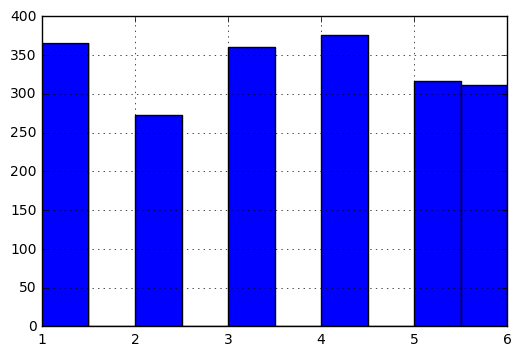

In [16]:
cleaneddf.categories.hist()

In [17]:
num_df = cleaneddf.iloc[:,8:]
num_df.head()

,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,PCIP01,PCIP03,PCIP04,PCIP05,...,OVERALL_YR2_N,OVERALL_YR3_N,OVERALL_YR4_N,OVERALL_YR6_N,OVERALL_YR8_N,DEBT_N,CUML_DEBT_N,REPAY_DT_N,SEPAR_DT_N,categories
0,1,3,4,1,1,5,0.0451,0.015,0.0075,0.000,...,1334,1257,1253,1259,1336,3044,3044,1788,2182,5
1,1,3,4,1,1,5,0.0000,0.000,0.0000,0.002,...,2724,2407,2101,2217,2450,5990,5990,3681,4495,4
2,1,3,4,2,1,5,0.0000,0.000,0.0000,0.000,...,171,167,149,170,145,528,528,266,406,6
3,1,3,4,1,1,5,0.0000,0.000,0.0000,0.000,...,1155,1322,1242,1054,1018,2652,2652,1607,1934,4
4,1,3,4,1,1,5,0.0000,0.000,0.0000,0.000,...,1418,1723,1667,1718,1498,3814,3814,2579,3176,6


In [18]:
named_df = cleaneddf.loc[:,'UNITID':'sch_deg']
named_df.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,sch_deg
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,3.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,3.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,3.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,3.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,3.0


In [19]:
Y_target= num_df.loc[:,"categories"].values

In [20]:
X_values = num_df.drop(['C150_4','categories'],1)
X_values.head()

,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,PCIP01,PCIP03,PCIP04,PCIP05,...,CDR3,OVERALL_YR2_N,OVERALL_YR3_N,OVERALL_YR4_N,OVERALL_YR6_N,OVERALL_YR8_N,DEBT_N,CUML_DEBT_N,REPAY_DT_N,SEPAR_DT_N
0,1,3,4,1,1,5,0.0451,0.015,0.0075,0.000,...,0.165,1334,1257,1253,1259,1336,3044,3044,1788,2182
1,1,3,4,1,1,5,0.0000,0.000,0.0000,0.002,...,0.070,2724,2407,2101,2217,2450,5990,5990,3681,4495
2,1,3,4,2,1,5,0.0000,0.000,0.0000,0.000,...,0.075,171,167,149,170,145,528,528,266,406
3,1,3,4,1,1,5,0.0000,0.000,0.0000,0.000,...,0.084,1155,1322,1242,1054,1018,2652,2652,1607,1934
4,1,3,4,1,1,5,0.0000,0.000,0.0000,0.000,...,0.190,1418,1723,1667,1718,1498,3814,3814,2579,3176


# Interesting visualizations

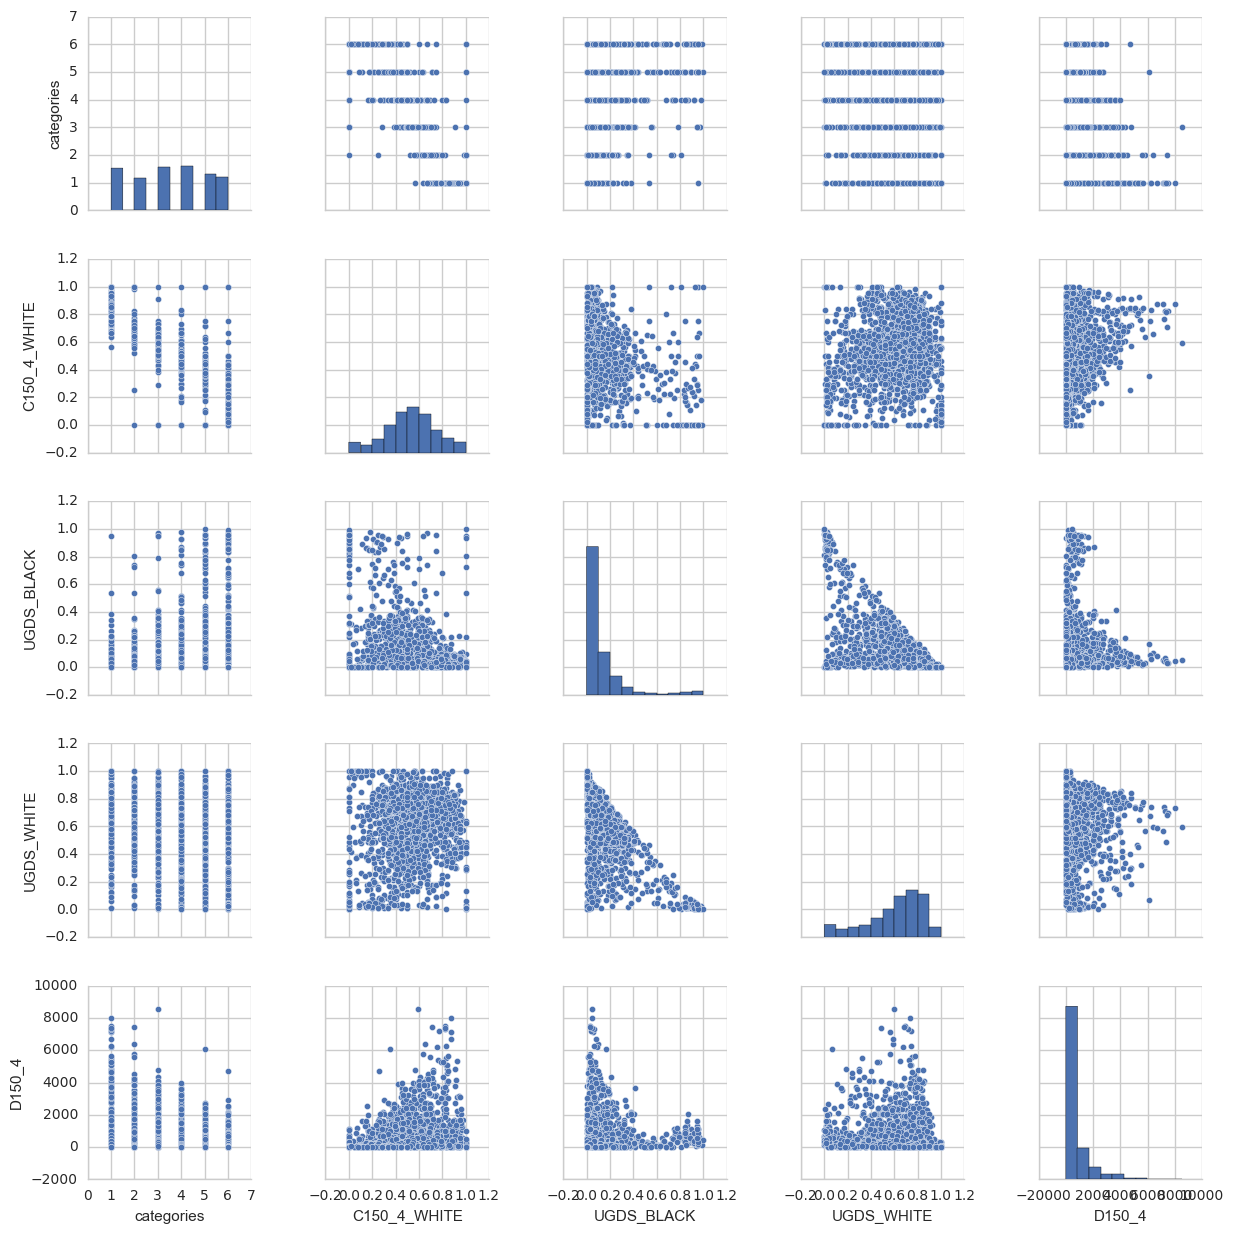

In [21]:
# when I did feature selections, I saw that the most correlated features are similar in nature, so I 
# wanted to run a pair plot analysis
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['categories', 'C150_4_WHITE','UGDS_BLACK','UGDS_WHITE','D150_4']

sns.pairplot(cleaneddf[cols].dropna(), size=2.5)
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

There are some correlation in between categories and UGDS_BLACK (Black enrollment) and UGDS_WHITE (white enrollment)